In [1]:
import tensorflow as tf
import numpy as np

In [21]:
not [1]

False

In [41]:
rap_input_dims = [1, 2]
RAPtrain = np.zeros((100, 256, 4))
Xt = RAPtrain[:,:,rap_input_dims].reshape(RAPtrain.shape[0],-1)

a = np.zeros((100, 3, 3, 3))
a = a[:,:,:,[1, 2]].reshape(a.shape[0],-1)
Xt.shape, a.shape

((100, 512), (100, 18))

In [40]:
np.hstack((Xt, a)).shape

(100, 530)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 18 and the array at index 1 has size 512

In [28]:
a.reshape(a.shape[0],-1).shape

(100, 18)

In [2]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
y = np.arange(20)
x = np.random.randint(10, size=20)
x, y

(array([7, 7, 0, 3, 3, 1, 0, 7, 6, 9, 5, 8, 7, 6, 3, 3, 4, 7, 6, 4]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]))

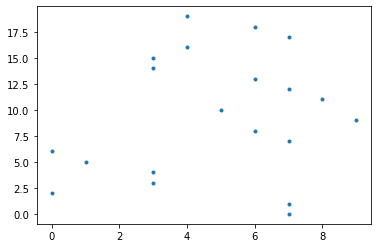

In [17]:
plt.plot(x, y, '.')

In [3]:
gpus = tf.config.list_physical_devices('XLA_GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'XLA_GPU')
        logical_gpus = tf.config.list_logical_devices('XLA_GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 0 Logical GPU


In [4]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [6]:
with tf.device('/device:XLA_GPU:0'):
    # Create some tensors
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)

print(c)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [17]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [15]:
physical_devices = tf.config.list_physical_devices('XLA_GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    assert tf.config.experimental.get_memory_growth(physical_devices[0])
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [16]:
physical_devices

[PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [14]:
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.get_memory_growth(physical_devices[0])

ValueError: Cannot set memory growth on non-GPU devices

In [18]:
tf.python.client.device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16278553043832215288, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6752702738862535912
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2467332273808832874
 physical_device_desc: "device: XLA_GPU device"]

In [1]:
import numpy as np

In [15]:
np.nanargmin(np.array([2, np.nan, 1, np.nan, 3]))

2

In [8]:
T = np.array([[1, 1, 1, 1],
              [2, 2, 2, 2]])
Y = np.array([[3, 3, 3, 3],
              [4, 4, 4, 4]])

np.sqrt((np.mean((Y - T)**2)))

2.0

In [14]:
Y[:, 0].flatten()

array([3, 4])